In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import os


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### merge 12 months of sales data into a single CSV file ###

In [3]:
df = pd.read_csv('C:/Users/ASUS/Anaconda2/dataset/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')



files = os.listdir('C:/Users/ASUS/Anaconda2/dataset/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')

months_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('C:\Users\ASUS\Anaconda2\dataset\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/' + file)
    months_df = pd.concat([months_df,df])
    
months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
months_df.to_csv('all_data.csv', index=False)

read the updated and modified dataframe(all_data.csv)

In [5]:
year_sales_df = pd.read_csv('all_data.csv')
year_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## clean up the modified dataframe (year_sales_df)

drop all NaN values

In [6]:
nan_df = year_sales_df[year_sales_df.isna().any(axis=1)]

nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
year_sales_df = year_sales_df.dropna(how='all')

year_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
## find 'Or and delete it'
year_sales_df = year_sales_df[year_sales_df['Order Date'].str[0:2] != 'Or']
year_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
## convert numbers columns to correct type

year_sales_df['Quantity Ordered'] = pd.to_numeric(year_sales_df['Quantity Ordered'])
year_sales_df['Price Each'] = pd.to_numeric(year_sales_df['Price Each'])

## add a month column 

In [10]:
# apply pd.to_datetime

year_sales_df['Month'] = pd.to_datetime(year_sales_df['Order Date']).dt.month

In [11]:
year_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


 add a city column using the .apply()

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

year_sales_df['City'] = year_sales_df['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))                                                              
######## another option### f string method in py3.5 ...  .apply(lambda x: f"{get_city(x)} ({get_stste(x)}")

year_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


### Add a sales column by multiplying quantity and price columns##

In [13]:
year_sales_df['Sales'] = year_sales_df['Quantity Ordered'] * year_sales_df['Price Each']
year_sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,11.99


 Q1 The best month for sales and how much was made ##?

In [14]:
year_sales_df.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


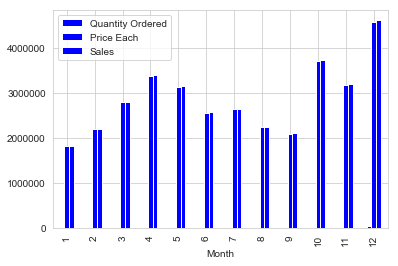

In [15]:
year_sales_df.groupby('Month').sum().plot(kind='bar',color='blue')

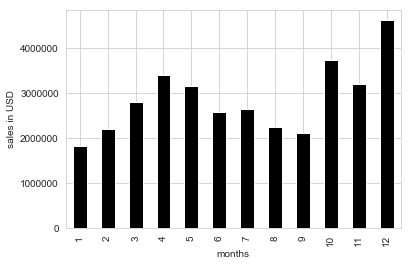

In [16]:
year_sales_df.groupby('Month')['Sales'].sum().plot(kind='bar',color='black')

plt.ylabel('sales in USD')
plt.xlabel('months')
plt.show()

Q2. which city had the highest number of sales?

In [17]:
year_sales_df.groupby('City', as_index=False).sum()

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
1,Austin TX,11153,1.809874e+06,69829,1.819582e+06
2,Boston MA,22528,3.637410e+06,141112,3.661642e+06
3,Dallas TX,16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
5,New York City NY,27932,4.635371e+06,175741,4.664317e+06
6,Portland ME,2750,4.471893e+05,17144,4.497583e+05
7,Portland OR,11303,1.860558e+06,70621,1.870732e+06
8,San Francisco CA,50239,8.211462e+06,315520,8.262204e+06
9,Seattle WA,16553,2.733296e+06,104941,2.747755e+06


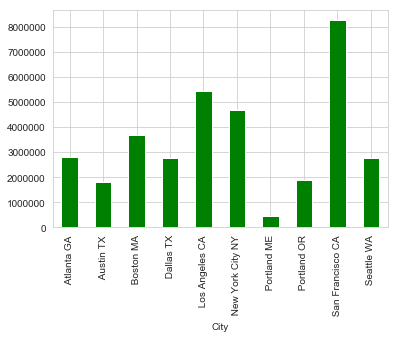

In [18]:
year_sales_df.groupby('City')['Sales'].sum().plot(kind='bar',color='green')

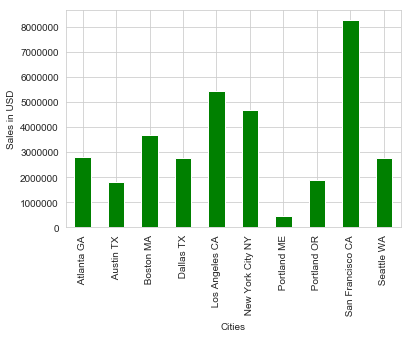

In [19]:
year_sales_df.groupby('City')['Sales'].sum().plot(kind='bar',color='green')

plt.ylabel('Sales in USD')
plt.xlabel('Cities')
plt.show()

Q3. what period should advertisements to maximize customer purchase

In [20]:
# use datetime and use to acesss specific hour of order

year_sales_df['Order Date'] = pd.to_datetime(year_sales_df['Order Date'])

In [21]:
# use datetime to get the hour the order was made 

year_sales_df['Hour'] = year_sales_df['Order Date'].dt.hour
## same procedure to get minutes 

In [22]:
year_sales_df.groupby('Hour',as_index=False).count()

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854
5,5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,8,6256,6256,6256,6256,6256,6256,6256,6256,6256
9,9,8748,8748,8748,8748,8748,8748,8748,8748,8748


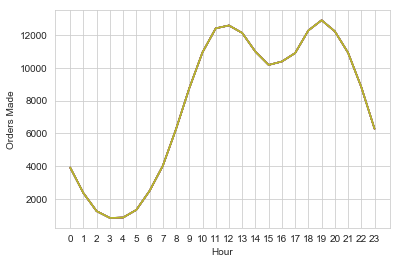

In [23]:
hours =[hour for hour, df in year_sales_df.groupby('Hour')]
plt.plot(hours,year_sales_df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Orders Made')
#plt.grid()
plt.show()

# will recommend posting adds around 11am(11) and 7pm(19)

Q4. Which products are often sold together?

In [24]:
# from order ID column sort out the duplicated orders
df = year_sales_df[year_sales_df['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()


df.head()


C:\Users\ASUS\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [25]:
#stackoverflow. counting-unique-pairs-of-numbers-into-a-python-dictionary//ref
from itertools import combinations
from collections import Counter 


pairs = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    pairs.update(Counter(combinations(row_list,2)))
    
for key, val in pairs.most_common(10):
    print(key, val)

(('iPhone', 'Lightning Charging Cable'), 1005)
(('Google Phone', 'USB-C Charging Cable'), 987)
(('iPhone', 'Wired Headphones'), 447)
(('Google Phone', 'Wired Headphones'), 414)
(('Vareebadd Phone', 'USB-C Charging Cable'), 361)
(('iPhone', 'Apple Airpods Headphones'), 360)
(('Google Phone', 'Bose SoundSport Headphones'), 220)
(('USB-C Charging Cable', 'Wired Headphones'), 160)
(('Vareebadd Phone', 'Wired Headphones'), 143)
(('Lightning Charging Cable', 'Wired Headphones'), 92)


Q5. What product sold the most & why? 

In [26]:
year_sales_df.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

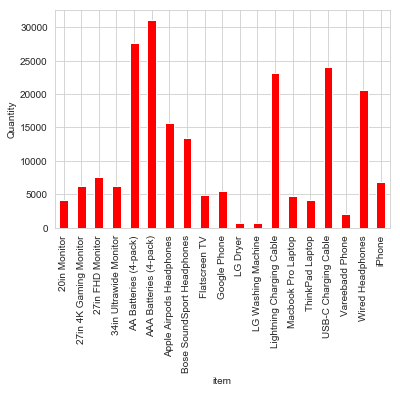

In [27]:
year_sales_df.groupby('Product')['Quantity Ordered'].sum().plot('bar',color='red')
    
plt.ylabel('Quantity')
plt.xlabel('item')
plt.show()

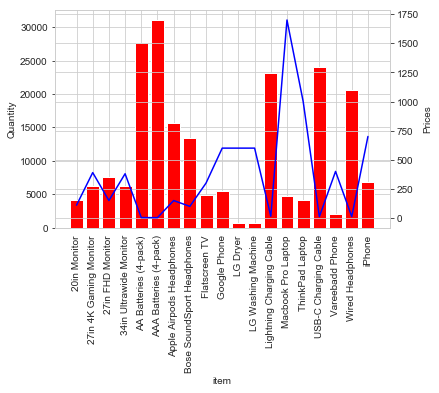

In [49]:
#stackoverflow/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib# ref

# add barplot of most sold product and plot prices of product,
# so reason for most sold products is based on prices!

prices = year_sales_df.groupby('Product')['Price Each'].mean()
product_group = year_sales_df.groupby('Product')
quantity_ordered = year_sales_df.groupby('Product')['Quantity Ordered'].sum()
products = [product for product, df in product_group]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='red')
ax2.plot(products,prices,'b-',color='blue')

ax1.set_xlabel('item')
ax1.set_ylabel('Quantity')
ax2.set_ylabel('Prices')

ax1.set_xticklabels(products, rotation='vertical', size=10)


plt.show()